In [1]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [2]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

In [3]:
""" fileopenbox opens the box to choose file
and help us store file path as string """
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [4]:
def cartoonify(Imagepath):
    #lets read the image
    pic=cv2.imread(Imagepath)
    print(pic)
    pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    print(pic)
    #checking if the image is correctly given of null
    if pic is None:
        print("please give the correct image or picture")
        sys.exit()
    resized1=cv2.resize(pic,(960,540))
   
    #converting an image into GrayScale
    grayimage=cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    resized2=cv2.resize(grayimage,(960,540))

    #Smoothening the Image
    smooth=cv2.medianBlur(grayimage,5)
    resized3=cv2.resize(smooth,(960,540))
    
    #edges for the cartoon effect
    getEdge = cv2.adaptiveThreshold(smooth, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    resized4=cv2.resize(getEdge,(960,540))
    
    #Removing the noise
    colorimage=cv2.bilateralFilter(pic,9,300,300)
    resized5=cv2.resize(colorimage,(960,540))
    
    #last step- cartoonifying the image
    cartoon=cv2.bitwise_and(colorimage,colorimage,mask=getEdge)
    resized6=cv2.resize(cartoon,(960,540))
    
    #All transitions Togethter
    # Plotting the whole transition
    images=[resized1, resized2, resized3, resized4, resized5, resized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    save1=Button(top,text="Save cartoon image",command=lambda: save(resized6, Imagepath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    plt.show()
    

In [5]:
def save(resized6,Imagepath):
    newname="CartoonImage"
    path1=os.path.dirname(Imagepath)
    extension=os.path.splitext(Imagepath)[1]
    path=os.path.join(path1,newname+extension)
    cv2.imwrite(path,cv2.cvtColor(resized6,cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newname +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

[[[108 109  99]
  [108 109  99]
  [108 109  99]
  ...
  [ 78  95  82]
  [ 77  94  81]
  [ 77  94  81]]

 [[107 108  98]
  [107 108  98]
  [107 108  98]
  ...
  [ 79  96  83]
  [ 79  96  83]
  [ 79  96  83]]

 [[107 108  98]
  [107 108  98]
  [107 108  98]
  ...
  [ 81  98  85]
  [ 81  98  85]
  [ 81  98  85]]

 ...

 [[ 31  39  44]
  [ 27  35  39]
  [ 28  36  40]
  ...
  [ 24  31  35]
  [ 25  32  36]
  [ 25  32  36]]

 [[ 28  36  40]
  [ 27  35  39]
  [ 28  36  40]
  ...
  [ 24  31  35]
  [ 25  32  36]
  [ 25  32  36]]

 [[ 28  36  40]
  [ 28  36  40]
  [ 27  35  39]
  ...
  [ 24  31  35]
  [ 23  30  34]
  [ 25  32  36]]]
[[[ 99 109 108]
  [ 99 109 108]
  [ 99 109 108]
  ...
  [ 82  95  78]
  [ 81  94  77]
  [ 81  94  77]]

 [[ 98 108 107]
  [ 98 108 107]
  [ 98 108 107]
  ...
  [ 83  96  79]
  [ 83  96  79]
  [ 83  96  79]]

 [[ 98 108 107]
  [ 98 108 107]
  [ 98 108 107]
  ...
  [ 85  98  81]
  [ 85  98  81]
  [ 85  98  81]]

 ...

 [[ 44  39  31]
  [ 39  35  27]
  [ 40  36  28]
  ..

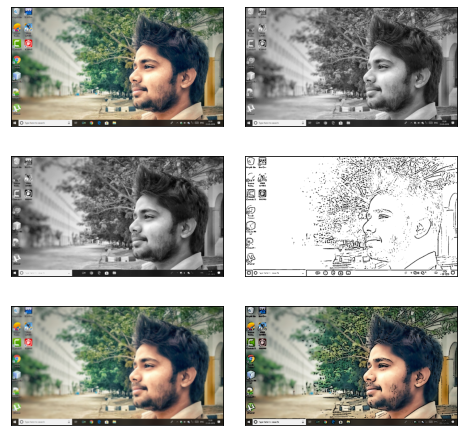

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Anaconda\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-4-5c62e0fbb4b4>", line 39, in <lambda>
    save1=Button(top,text="Save cartoon image",command=lambda: save(resized6, Imagepath),padx=30,pady=5)
  File "<ipython-input-5-832039c46292>", line 8, in save
    tk.messagebox.showinfo(title=None, message=I)
AttributeError: module 'tkinter' has no attribute 'messagebox'


In [6]:
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()